In [57]:
import requests
import hashlib
import random


def Baidu_Translate(lang_in, lang_out, context):
    # 设置百度翻译API的请求参数
    api_url = 'https://fanyi-api.baidu.com/api/trans/vip/translate'
    app_id = '*********'
    app_key = '*************'
    from_lang = lang_in
    to_lang = lang_out

    # 要翻译的文本
    text = context

    # 生成随机数作为 salt 值
    salt = random.randint(32768, 65536)

    # 计算签名
    sign = app_id + text + str(salt) + app_key
    md5 = hashlib.md5()
    md5.update(sign.encode('utf-8'))
    sign = md5.hexdigest()

    # 发送翻译请求
    data = {
        'q': text,
        'appid': app_id,
        'salt': salt,
        'from': from_lang,
        'to': to_lang,
        'sign': sign
    }
    response = requests.post(api_url, data=data)
    result = response.json()

    # 解析翻译结果
    return result['trans_result'][0]['dst']

## VGG16卷积核可视化


In [70]:
import numpy
import matplotlib.pyplot as plt

# 显示中文标签, 显示负号
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions

# VGG模型权重: ImageNet
model = VGG16(weights="imagenet")
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_54 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [71]:
for i in range(32):
    print(i, model.get_weights()[i].shape)

0 (3, 3, 3, 64)
1 (64,)
2 (3, 3, 64, 64)
3 (64,)
4 (3, 3, 64, 128)
5 (128,)
6 (3, 3, 128, 128)
7 (128,)
8 (3, 3, 128, 256)
9 (256,)
10 (3, 3, 256, 256)
11 (256,)
12 (3, 3, 256, 256)
13 (256,)
14 (3, 3, 256, 512)
15 (512,)


KeyboardInterrupt: 

## 可视化Block1_conv1的前64个卷积核

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

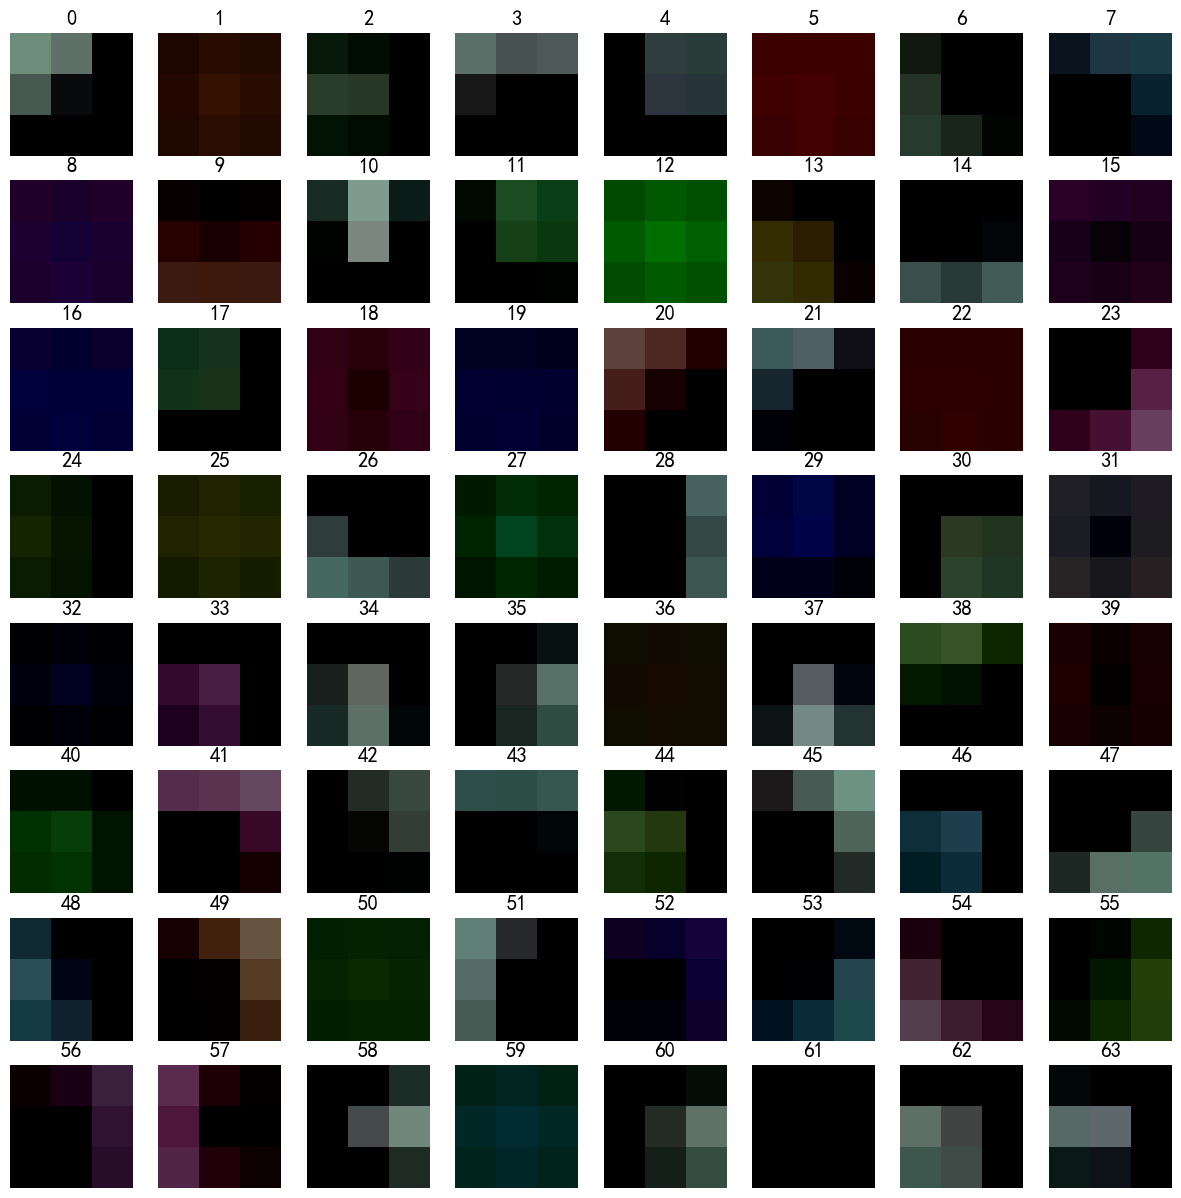

In [62]:
n = 8
fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(15, 15))
for i in range(n * n):
    axes[i // n, i % n].imshow(model.get_weights()[0][:, :, :, i])
    axes[i // n, i % n].set_title("{}".format(i), fontsize=15)
    axes[i // n, i % n].axis("off")

## 项目实战

In [77]:
import re
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.utils as image
from keras.applications.vgg16 import decode_predictions
import time

model = VGG16(weights="imagenet")
image_path = "test_data/puzzle.jpeg"
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = numpy.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

for data in decode_predictions(preds, top=5)[0]:
    re.sub(r"_", " ", data[1])
    trans_result = Baidu_Translate("en", "zh", data[1])
    print(f"检测结果为: {trans_result} 匹配值: {format(data[2], '000.0%')}")
    time.sleep(1)


1/1 [==============================] - 1s 613ms/step
检测结果为: 拼图 匹配值: 89%
检测结果为: 铅笔夹 匹配值: 3%
检测结果为: 橡胶擦除器 匹配值: 3%
检测结果为: 发滑 匹配值: 2%
检测结果为: 项链 匹配值: 0%


## 基于CNN的花束图像分类模型

In [97]:
from roboflow import Roboflow

rf = Roboflow(api_key="XUh43FyPL5fDd9LgHSuD")
project = rf.workspace().project("-3eozf")
model = project.version(1).model
# infer on a local image
data = model.predict("test_data/lily.png").json()
print("消耗时间:", format(data["predictions"][0]["time"], "0.00"), "s")
data = data["predictions"][0]["predictions"]
max_confidence = 0.0
max_key = None

for key, value in data.items():
    confidence = value['confidence']
    if confidence > max_confidence:
        max_confidence = confidence
        max_key = key

percentage = max_confidence * 100
print("最高置信度的花类为:", max_key)
print("百分比:", percentage)

loading Roboflow workspace...
loading Roboflow project...
消耗时间: 0.2 s
最高置信度的键值为: water_lily
百分比: 98.87506365776062
